In [1]:
from nlpkf.models.seq2seq import preprocess_catalan, Translator
all_english, all_catalan = preprocess_catalan("cat.txt")

In [2]:

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)
def filter_prefixes(lang_1, lang_2, prefixes):
    filtered_1 = []
    filtered_2 = []
    for sent_1, sent_2 in zip(lang_1, lang_2): 
        if sent_1[5:].strip().lower().startswith(prefixes):
            filtered_1.append(sent_1)
            filtered_2.append(sent_2)
    return filtered_1, filtered_2
english, catalan = filter_prefixes(all_english, all_catalan, eng_prefixes)

In [3]:
#english, catalan = all_english, all_catalan

In [4]:

tok_kwargs = dict(remove_stopwords=False, use_stems=False, 
                  to_lowercase=False, use_lemma=False, remove_punctuation=True, normalize_strings=True)

In [5]:
import time
start = time.time()
trans = Translator(16, 32, tokenizer_kwargs=tok_kwargs, vectorizer_kwargs={"lowercase":False}, pretrained=False)
end = time.time()
print(end - start)

9.531507015228271


In [7]:
trans.target_proc.build_vocabulary(catalan)

In [6]:
trans.target_proc.clean_text(catalan)

['/SOS ara estic de servei /EOS',
 '/SOS ets un bon noi /EOS',
 '/SOS ell es un bon atleta /EOS',
 '/SOS es una bona nedadora /EOS',
 '/SOS tu ets tot per mi /EOS',
 '/SOS es el director d un hotel /EOS',
 '/SOS ella fa una festa aquesta nit /EOS',
 '/SOS es una persona molt considerada /EOS',
 '/SOS ell s esta millorant poc a poc /EOS',
 '/SOS esta millorant poc a poc /EOS',
 '/SOS ens sap greu la molestia causada /EOS',
 '/SOS ell es tres anys mes jove que el pare /EOS',
 '/SOS estic segur de la seva victoria al tennis /EOS',
 '/SOS ho fare estigueu o no d acord amb mi /EOS',
 '/SOS es un dels candidats que es presenta per alcalde /EOS']

In [5]:
trans.target_proc.vocabulary


{}

In [6]:
%%time
x_corpus, y_corpus = trans.fit(english, catalan)

Building vocabulary.
Converting to tensors.
Initializing model and optimizers.
CPU times: user 3.64 s, sys: 3.97 s, total: 7.62 s
Wall time: 2.74 s


In [10]:
trans.encoder

EncoderRNN(
  (embedding): Embedding(967, 128)
  (compressed): Linear(in_features=128, out_features=64, bias=True)
  (gru): GRU(64, 64)
)

In [11]:
trans.decoder

AttnDecoderRNN(
  (embedding): Embedding(1191, 128)
  (attn): Linear(in_features=192, out_features=24, bias=True)
  (attn_combine): Linear(in_features=192, out_features=64, bias=True)
  (dropout): Dropout(p=0.1)
  (gru): GRU(64, 64)
  (out): Linear(in_features=64, out_features=1191, bias=True)
)

In [ ]:
trans.train(x_corpus, y_corpus, print_every=1, n_iters=100, preprocess=False, plot_every=5)

 40%|████      | 6/15 [00:00<00:00, 58.67it/s]

Elapsed 0m 0s - left 0m 29s epoch: 1  complete: 1% loss: 51.8218


 47%|████▋     | 7/15 [00:00<00:00, 65.12it/s]

Elapsed 0m 0s - left 0m 29s epoch: 2  complete: 2% loss: 47.0394


 40%|████      | 6/15 [00:00<00:00, 59.73it/s]

Elapsed 0m 0s - left 0m 28s epoch: 3  complete: 3% loss: 44.2523


 47%|████▋     | 7/15 [00:00<00:00, 59.29it/s]

Elapsed 0m 1s - left 0m 28s epoch: 4  complete: 4% loss: 45.2495


 47%|████▋     | 7/15 [00:00<00:00, 65.27it/s]

Elapsed 0m 1s - left 0m 27s epoch: 5  complete: 5% loss: 42.2212


 47%|████▋     | 7/15 [00:00<00:00, 58.45it/s]

Elapsed 0m 1s - left 0m 27s epoch: 6  complete: 6% loss: 34.6891


 47%|████▋     | 7/15 [00:00<00:00, 65.78it/s]

Elapsed 0m 2s - left 0m 26s epoch: 7  complete: 7% loss: 36.2988


 47%|████▋     | 7/15 [00:00<00:00, 65.72it/s]

Elapsed 0m 2s - left 0m 26s epoch: 8  complete: 8% loss: 35.3643


 47%|████▋     | 7/15 [00:00<00:00, 66.55it/s]

Elapsed 0m 2s - left 0m 25s epoch: 9  complete: 9% loss: 34.8715


 47%|████▋     | 7/15 [00:00<00:00, 59.03it/s]

Elapsed 0m 2s - left 0m 25s epoch: 10  complete: 10% loss: 35.9048


 40%|████      | 6/15 [00:00<00:00, 59.03it/s]

Elapsed 0m 3s - left 0m 25s epoch: 11  complete: 11% loss: 37.8536


 47%|████▋     | 7/15 [00:00<00:00, 63.74it/s]

Elapsed 0m 3s - left 0m 24s epoch: 12  complete: 12% loss: 37.4162


 40%|████      | 6/15 [00:00<00:00, 58.58it/s]

Elapsed 0m 3s - left 0m 24s epoch: 13  complete: 13% loss: 38.1519


 40%|████      | 6/15 [00:00<00:00, 55.14it/s]

Elapsed 0m 3s - left 0m 24s epoch: 14  complete: 14% loss: 38.2434


 47%|████▋     | 7/15 [00:00<00:00, 62.83it/s]

Elapsed 0m 4s - left 0m 24s epoch: 15  complete: 15% loss: 35.4816


 40%|████      | 6/15 [00:00<00:00, 59.60it/s]

Elapsed 0m 4s - left 0m 23s epoch: 16  complete: 16% loss: 33.8363


 40%|████      | 6/15 [00:00<00:00, 53.67it/s]

Elapsed 0m 4s - left 0m 23s epoch: 17  complete: 17% loss: 34.7813


 40%|████      | 6/15 [00:00<00:00, 59.14it/s]

Elapsed 0m 5s - left 0m 23s epoch: 18  complete: 18% loss: 35.6005


 40%|████      | 6/15 [00:00<00:00, 58.91it/s]

In [6]:
%%time
tensors_catalan = trans.sentences_to_tensors(catalan, trans.target_proc)

CPU times: user 21 s, sys: 28.4 s, total: 49.4 s
Wall time: 7.15 s


In [5]:
%%time

tensors_english = trans.sentences_to_tensors(english, trans.src_proc)

CPU times: user 22.8 s, sys: 31 s, total: 53.8 s
Wall time: 7.78 s


<Figure size 432x288 with 0 Axes>

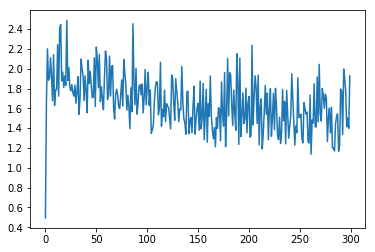

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
trans.plot_loss()


In [13]:
trans

<function nlpkf.models.seq2seq.Translator.max_seq_len(*vectors_list)>

input = /SOS We are sorry for the inconvenience. /EOS
output = /SOS es una bon la molestia /EOS


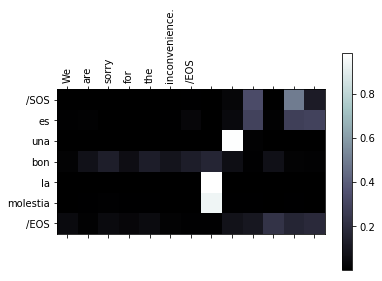

('/SOS We are sorry for the inconvenience. /EOS',
 ['/SOS', 'es', 'una', 'bon', 'la', 'molestia', '/EOS'])

In [20]:
trans.evaluate_attention(english[10])

<Figure size 432x288 with 0 Axes>

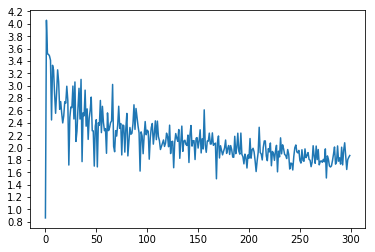

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def plot_loss(self):
    
    #plt.switch_backend('agg')
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    return plt.plot(self.plot_losses)
plot_loss(trans)
plt.show()

In [21]:
def show_attention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)
    # xticks =  [''] + input_sentence.split(' ') + ['<EOS>']
    # yticks = [''] + output_words
    xticks = [''] + input_sentence.split(' ')
    yticks = [''] + output_words
    # Set up axes
    ax.set_xticklabels(xticks, rotation=90)
    ax.set_yticklabels(yticks)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluate_attention(input_sentence, trans, *args, **kwargs):
    output_words, attentions = trans.predict(input_sentence, *args, **kwargs)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    show_attention(input_sentence, output_words, attentions)
    return input_sentence, output_words

input = /SOS We are sorry for the inconvenience. /EOS
output = /SOS es una bon anys mes jove que el pare /EOS


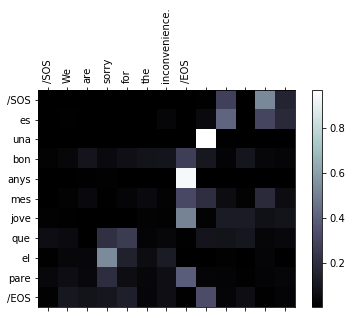

('/SOS We are sorry for the inconvenience. /EOS',
 ['/SOS',
  'es',
  'una',
  'bon',
  'anys',
  'mes',
  'jove',
  'que',
  'el',
  'pare',
  '/EOS'])

In [24]:
evaluate_attention(english[10], trans)

In [15]:
trans.target_proc.clean_text(catalan)

['/SOS carai /EOS',
 '/SOS de veritat /EOS',
 '/SOS gracies /EOS',
 '/SOS adeu /EOS',
 '/SOS afanya t /EOS',
 '/SOS massa tard /EOS',
 '/SOS gracies /EOS',
 '/SOS puc ajudar /EOS',
 '/SOS l envejo /EOS',
 '/SOS el temps vola /EOS',
 '/SOS jo tambe tinc anys /EOS',
 '/SOS estic a casa /EOS',
 '/SOS demana un desig /EOS',
 '/SOS qui paga mana /EOS',
 '/SOS t estimem /EOS',
 '/SOS us estimem /EOS',
 '/SOS qui ets tu /EOS',
 '/SOS qui es voste /EOS',
 '/SOS qui ets /EOS',
 '/SOS qui sou /EOS',
 '/SOS vine amb nosaltres /EOS',
 '/SOS ell te un gos /EOS',
 '/SOS ella es va aixecar /EOS',
 '/SOS hola a tots /EOS',
 '/SOS estic desesperat /EOS',
 '/SOS deixa m intentar ho /EOS',
 '/SOS tens bona cara /EOS',
 '/SOS fas bona cara /EOS',
 '/SOS fas bon aspecte /EOS',
 '/SOS estas boig /EOS',
 '/SOS puc ajudar /EOS',
 '/SOS bon any nou /EOS',
 '/SOS necessito un segell /EOS',
 '/SOS el vaig veure saltar /EOS',
 '/SOS deixa m en pau /EOS',
 '/SOS qui ho ha pintat /EOS',
 '/SOS el seu llibre es roig

input =  /SOS Make a wish. /EOS 
output = /SOS on va es /EOS


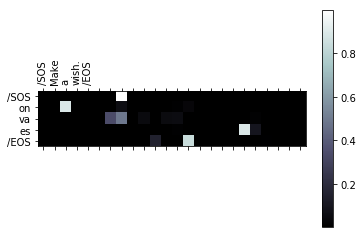

input =  /SOS I'm 17, too. /EOS 
output = /SOS on va /EOS


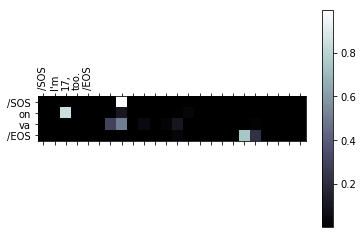

(" /SOS I'm 17, too. /EOS ", ['/SOS', 'on', 'va', '/EOS'])

In [20]:
input_sentence, output_words = evaluate_attention(english[12], trans)
evaluate_attention(english[10], trans)

In [47]:
output_words, attentions = trans.predict(english[0])

In [53]:
attentions.numpy()

array([[8.99501902e-04, 1.00110110e-03, 1.26862316e-03, 9.44802887e-04,
        9.09186259e-04, 1.36664440e-03, 9.74739015e-01, 1.45714665e-02,
        6.60484293e-05, 8.19127657e-04, 1.63712291e-04, 8.37856496e-04,
        1.07839750e-03, 3.83488368e-04, 9.51047929e-04],
       [1.91380401e-04, 3.89978057e-04, 5.70050965e-04, 6.90614455e-04,
        1.49605470e-03, 1.34791841e-03, 9.83194530e-01, 8.40323791e-03,
        7.00105273e-04, 1.97796806e-04, 2.12838687e-03, 1.60999480e-04,
        1.83946977e-04, 1.13916562e-04, 2.31140744e-04],
       [1.38908086e-04, 3.02571134e-04, 4.03802289e-04, 6.36337383e-04,
        1.67018466e-03, 1.09714805e-03, 4.17740457e-02, 3.69595340e-03,
        1.44510552e-01, 4.16034891e-05, 8.04907382e-01, 2.20289105e-04,
        2.02503681e-04, 1.88132180e-04, 2.10631551e-04],
       [2.29077656e-02, 6.31585810e-03, 8.88779853e-03, 5.16405217e-02,
        3.26258726e-02, 1.84405129e-02, 3.70427012e-01, 8.06902051e-02,
        4.46235053e-02, 2.77205603e-0

In [50]:
output_words

['/SOS', 'sos', 'ara', 'estic', 'de', 'servei', '<EOS>']

In [51]:
english[0].split(" ")

['', '/SOS', 'I', 'am', 'now', 'on', 'duty.', '/EOS', '']

In [35]:
 input_sentence.split(' ')[1:-1]

['', '/SOS', 'Come', 'with', 'us.', '/EOS', '']

In [38]:
n = 2
trans.evaluate(english[n], catalan[n])

>  /SOS He is a good athlete. /EOS 
=  /SOS Ell és un bon atleta. /EOS 
< /SOS sos es una bona nedadora <EOS>



In [13]:
def evaluateRandomly(pairs, trans, n=1):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = trans.evaluate(pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [15]:
import random
evaluateRandomly([(english[10], catalan[10])], trans)

>  /SOS I'm 17, too. /EOS 
=  /SOS Jo també tinc 17 anys. /EOS 
< /SOS sos no no el que que <EOS>



In [10]:
%%time
max_seq_len(tensors_catalan, tensors_english)

CPU times: user 66 µs, sys: 85 µs, total: 151 µs
Wall time: 154 µs


24

In [9]:
import torch
import numpy as np
torch.from_numpy(np.arange(10)).to("cuda")

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')

In [99]:
from nlpkf.tokenizer import EOS_TOKEN, SOS_TOKEN
def add_tokens_to_sentence(text, sos_token: str=SOS_TOKEN, eos_token: str=EOS_TOKEN):
    return " {} {} {} ".format(sos_token, text, eos_token)
    
def preprocess_translator(text, proc_func, sos_token: str=SOS_TOKEN, eos_token: str=EOS_TOKEN):
    source = []
    target = []
    for src, dst in proc_func(text):

        src, dst = add_tokens_to_sentence(src), add_tokens_to_sentence(dst)
        source.append(src)
        target.append(dst)
    return source, target
    

In [97]:
[tuple(x.split("\t")) for x in str(data).split("\n")][0]

('Wow!', 'Carai!')

In [101]:
src, dst = preprocess_translator(data, lambda x: [tuple(x.split("\t")) for x in str(data).split("\n")[:-1]])

In [102]:
src

[' /SOS Wow! /EOS ',
 ' /SOS Really? /EOS ',
 ' /SOS Thanks. /EOS ',
 ' /SOS Goodbye! /EOS ',
 ' /SOS Hurry up. /EOS ',
 ' /SOS Too late. /EOS ',
 ' /SOS Thank you. /EOS ',
 ' /SOS Can I help? /EOS ',
 ' /SOS I envy him. /EOS ',
 ' /SOS Time flies. /EOS ',
 " /SOS I'm 17, too. /EOS ",
 " /SOS I'm at home. /EOS ",
 ' /SOS Make a wish. /EOS ',
 ' /SOS Money talks. /EOS ',
 ' /SOS We love you. /EOS ',
 ' /SOS We love you. /EOS ',
 ' /SOS Who are you? /EOS ',
 ' /SOS Who are you? /EOS ',
 ' /SOS Who are you? /EOS ',
 ' /SOS Who are you? /EOS ',
 ' /SOS Come with us. /EOS ',
 ' /SOS He has a dog. /EOS ',
 ' /SOS She stood up. /EOS ',
 ' /SOS Hi, everybody. /EOS ',
 " /SOS I'm desperate. /EOS ",
 ' /SOS Let me try it. /EOS ',
 ' /SOS You look good. /EOS ',
 ' /SOS You look good. /EOS ',
 ' /SOS You look good. /EOS ',
 ' /SOS Are you insane? /EOS ',
 ' /SOS Can I help you? /EOS ',
 ' /SOS Happy New Year! /EOS ',
 ' /SOS I need a stamp. /EOS ',
 ' /SOS I saw him jump. /EOS ',
 ' /SOS Leave me 

In [1]:
import torch
torch.tensor([[0]], device="cpu")

tensor([[0]])

In [2]:

torch.cuda.is_available()

True

In [10]:
for sent in doc.sents:
    print(sent)

b'Wow!\tCarai!\nReally?\tDe
veritat?\nThanks.\tGr\xc3\xa0cies!\nGoodbye!\tAd\xc3\xa9u!\nHurry up.\tAfanya\'t.\nToo
late.\tMassa tard.\nThank you.\tGr\xc3\xa0cies!\nCan
I help?\tPuc ajudar?\nI envy him.\tL\'envejo.\nTime flies.\tEl temps
vola.\nI\'m 17, too.\tJo
tamb\xc3\xa9 tinc 17
anys.\nI\'m at home.\tEstic a casa.\nMake
a wish.\tDemana un desig\nMoney talks.\tQui paga,
mana.\nWe love you.\tT\'estimem.\nWe love
you.\tUs
estimem.\nWho are you?\tQui ets
tu?\nWho are you?\tQui
\xc3\xa9s vost\xc3\xa8?\nWho are you?\tQui
ets?\nWho are you?\tQui sou?\nCome with us.\tVine amb nosaltres.\nHe has a dog.\tEll t\xc3\xa9 un gos.\nShe stood up.\tElla es va aixecar.\nHi,
everybody.\tHola a tots.\nI\'m desperate.\tEstic desesperat.\nLet
me try it.\tDeixa\'m intentar-ho.\nYou look good.\tTens bona cara.\nYou look good.\tFas bona cara.\nYou look
good.\tFas bon aspecte.\nAre you insane?\tEst\xc3\xa0s boig?\nCan I help you?\tPuc ajudar?\nHappy New Year!\tBon any nou!\nI need a stamp.\tNecessito un sege